In [1]:
import os
import sys
import requests
import pandas as pd
import matplotlib.pyplot as plt
# Plot portfolio_total_value with formatted y-axis ticks for readability
import matplotlib.ticker as mticker

# Set the notebook to the root directory
ROOT_DIR = os.path.abspath(os.path.join(".."))
sys.path.insert(0, ROOT_DIR)

# Define the local endpoint
endpoint = f"http://127.0.0.1:8000/portfolio_valuation/get_daily_portfolio_snapshot/?start_date=2025-01-01&end_date=2025-06-30"
# endpoint = f"http://127.0.0.1:8000/portfolio_valuation/get_daily_portfolio_snapshot/?start_date=2024-06-01&end_date=2024-12-31"

# Make a GET request to the local endpoint
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the 'data' part
    df = pd.DataFrame(data["data"])
    # Convert numeric columns from strings to float (if needed)
    numeric_columns = ["nav_per_unit"]
    df[numeric_columns] = df[numeric_columns].astype(float)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd



# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Plot total_value
fig.add_trace(go.Scatter(x=df['date'], y=pd.to_numeric(df['total_value']), mode='lines',
                         name='Fund Total Value', line=dict(color='blue')),
              row=1, col=1)
fig.update_yaxes(title_text='Fund Value', row=1, col=1)

# Plot nav_per_unit
fig.add_trace(go.Scatter(x=df['date'], y=df['nav_per_unit'], mode='lines',
                         name='NAV per Unit', line=dict(color='orange')),
              row=2, col=1)
fig.update_yaxes(title_text='NAV per Unit', row=2, col=1)
fig.update_xaxes(title_text='Date', row=2, col=1)


# Plot portfolio_total_value
fig.add_trace(go.Scatter(x=df['date'], y=pd.to_numeric(df['portfolio_total_value']), mode='lines',
                         name='Portfolio Total Value', line=dict(color='green')), # Changed color for distinction
              row=3, col=1)
fig.update_yaxes(title_text='Portfolio Total Value', row=3, col=1, tickformat=",.0f") # Format with thousands separator
fig.update_xaxes(title_text='Date', row=3, col=1)

# Plot cash
fig.add_trace(go.Scatter(x=df['date'], y=pd.to_numeric(df['cash']), mode='lines',
                         name='Cash Total Value', line=dict(color='green')), # Changed color for distinction
              row=4, col=1)
fig.update_yaxes(title_text='Cash Total Value', row=4, col=1, tickformat=",.0f") # Format with thousands separator
fig.update_xaxes(title_text='Date', row=4, col=1)

# Update layout for overall chart
fig.update_layout(height=800, title_text="Fund Performance Overview",
                  hovermode="x unified") # 'x unified' shows all traces at a given x-value on hover

fig.show()

# Check on drops and spikes in portfolio_total_value
# check on when nvda splitted

In [3]:
df.tail(15)

,id,date,total_value,total_units,nav_per_unit,gain_or_loss,cash,portfolio_total_value,net_inflows
114,897,2025-06-10,16947.65,8420.18407812,2.008386,6439.76,8067.40,8880.25,10507.89
115,898,2025-06-11,16850.33,8420.18407812,2.012741,6342.44,8067.40,8782.93,10507.89
116,899,2025-06-12,16825.01,8420.18407812,2.001183,6317.12,8067.40,8757.61,10507.89
117,900,2025-06-13,16813.52,8420.18407812,1.998176,6305.63,8067.40,8746.12,10507.89
118,901,2025-06-16,16793.28,8420.18407812,1.996811,6285.39,8067.40,8725.88,10507.89
119,902,2025-06-17,16822.67,8420.18407812,1.994408,6314.78,8067.40,8755.27,10507.89
120,903,2025-06-18,16849.98,8420.18407812,1.997898,6342.09,8067.40,8782.58,10507.89
121,904,2025-06-19,14144.75,8420.18407812,2.001142,3636.86,8067.40,6077.35,10507.89
122,905,2025-06-20,16812.81,8420.18407812,1.679862,6304.92,8067.40,8745.41,10507.89
123,906,2025-06-23,16780.40,8420.18407812,1.996727,6272.51,8067.40,8713.00,10507.89


In [4]:
# Define the local endpoint
endpoint = "http://127.0.0.1:8000/portfolio_valuation/user_snapshots/1/?start_date=2022-02-01&end_date=2025-05-01"

# Make a GET request to the local endpoint
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the 'data' part
    df = pd.DataFrame(data["snapshots"])
    # Convert numeric columns from strings to float (if needed)
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



         date  units_held  value_held
0  2022-02-17      2100.0      2100.0
1  2022-02-18      2100.0      2100.0
2  2022-02-21      2100.0      2100.0
3  2022-02-22      2100.0      2100.0
4  2022-02-23      2100.0      2100.0


<Axes: >

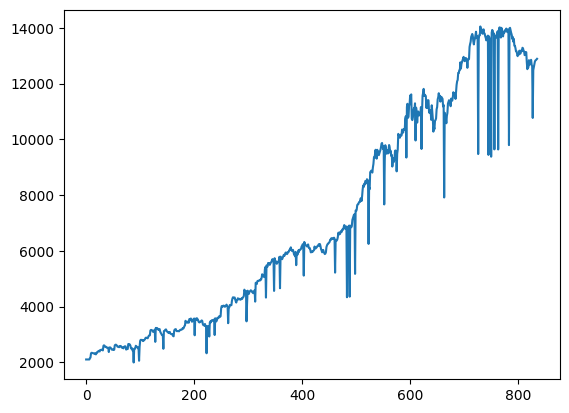

In [5]:
df.value_held.plot()

In [6]:
# Define the local endpoint
endpoint = "http://127.0.0.1:8000/transactions/list/?="

# Make a GET request to the local endpoint
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the 'data' part
    df = pd.DataFrame(data["data"])
    # Convert numeric columns from strings to float (if needed)
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

    id     type  user        date   amount currency ticker shares metadata
0  306  deposit   1.0  2022-02-17  2100.00      EUR   None   None       {}
1  308  deposit   2.0  2022-02-18   400.00      EUR   None   None       {}
2  294      fee   1.0  2022-02-25    -1.34      EUR   None   None       {}
3  295      fee   1.0  2022-02-25    -0.50      EUR   None   None       {}
4  297      fee   1.0  2022-02-25    -0.37      EUR   None   None       {}


In [ ]:
# df.to_excel("transactions.xlsx", index=False)